In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [16]:
df=pd.read_csv("HR.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   float64
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

- NO NULLS 

In [30]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
X=df[['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
    'Education', 'EducationField', 'EmployeeCount',
       'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
X.head()

,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeCount,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,2.0,1102,2.0,2,1.0,1,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,0.0,1.0,279,1.0,1,1.0,1,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,1.0,2.0,1373,1.0,2,4.0,1,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,0.0,1.0,1392,1.0,4,1.0,1,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,0.0,2.0,591,1.0,1,3.0,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [33]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [34]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

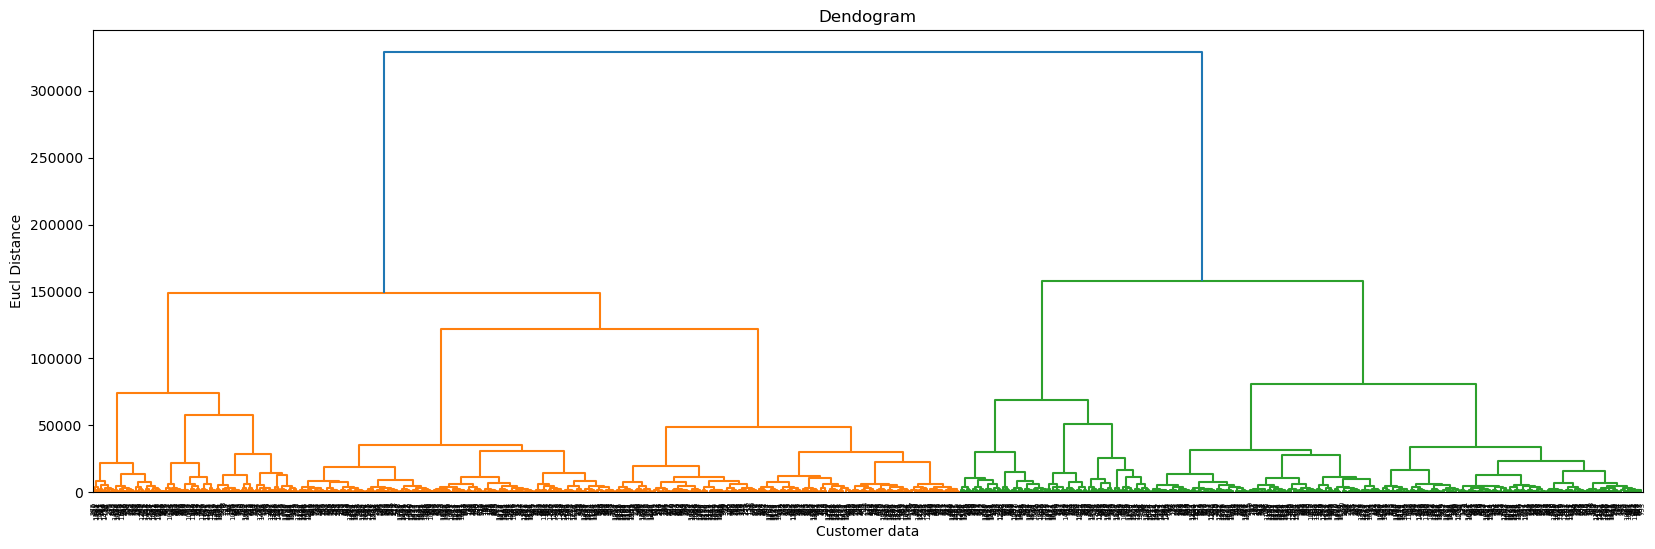

In [35]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

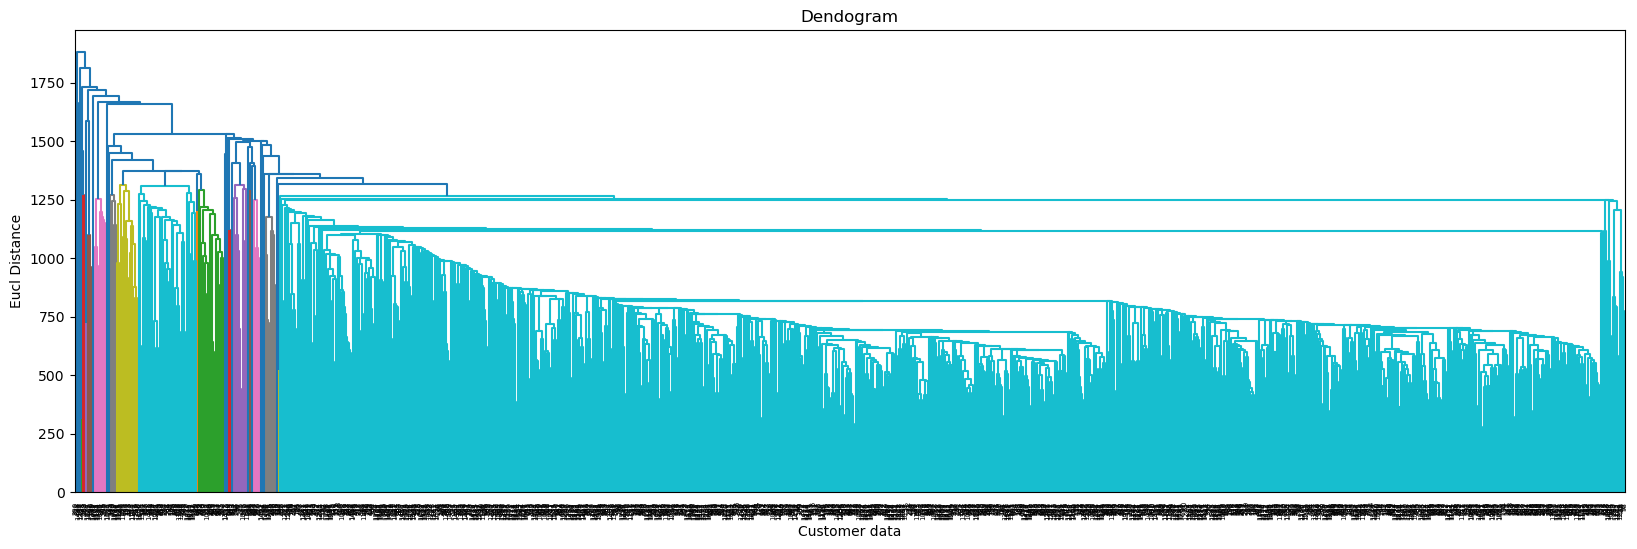

In [36]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(X,method='single'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

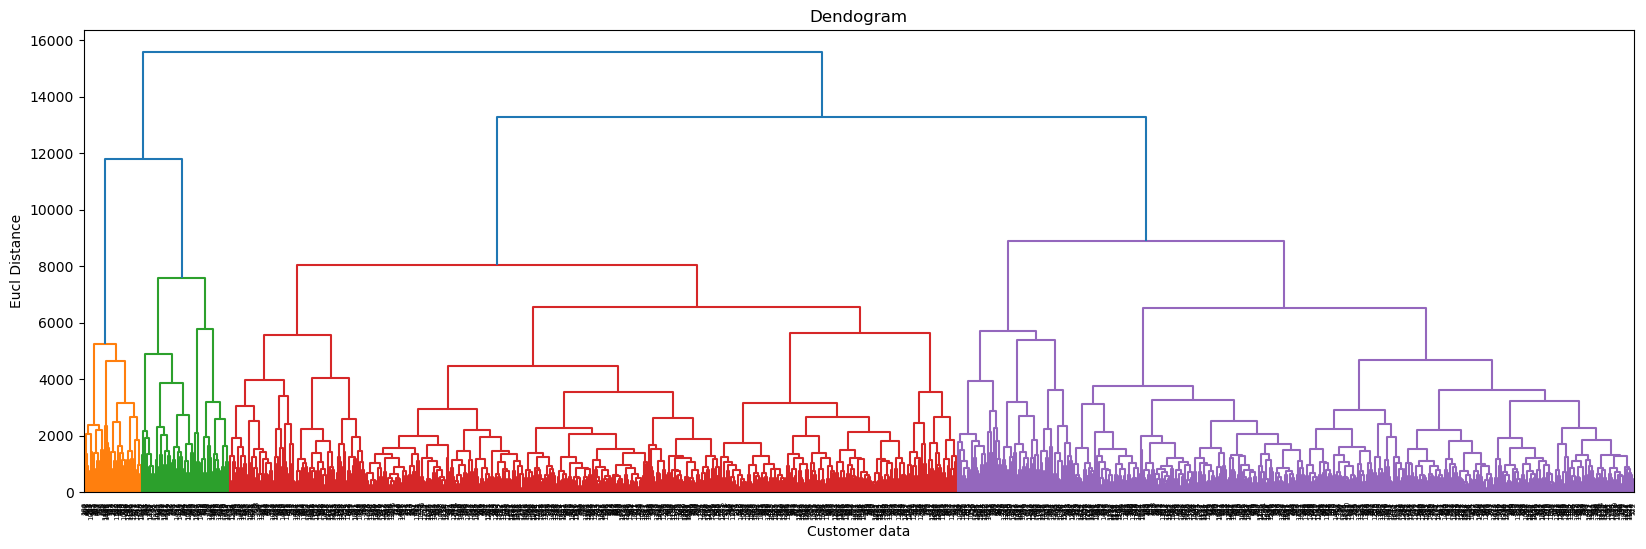

In [39]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(X,method='average'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

- NOW IF I REDUCE SOME UNWANTED FEATURES AND USE VERAGE METHOD AND IT WILL LOOK LIKE THE ABOVE FIGURE BUT ITS UNABLE TO ANALYSE

- GOING WITH THE LONGEST VERTICAL LINE THERE ARE 4

- BY ANALYSING WARD METHOD IT IS STATING TO USE 4 CLUSTERS 

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
group=AgglomerativeClustering(n_clusters=2)
cluster=group.fit_predict(X)
print(cluster)

[0 0 1 ... 1 0 1]


In [56]:
#model evaluation tool
from sklearn.metrics import silhouette_score

silhouette_score(X,cluster)

0.43874010997590956

In [59]:
#save data according to the cluster for further analysis
customer_cluster_0=df[cluster==0]
customer_cluster_1=df[cluster==1]

In [61]:
print(customer_cluster_1)

      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
2      37        1.0             2.0       1373         1.0                 2   
6      59        0.0             2.0       1324         1.0                 3   
8      38        0.0             1.0        216         1.0                23   
13     34        0.0             2.0       1346         1.0                19   
15     29        0.0             2.0       1389         1.0                21   
...   ...        ...             ...        ...         ...               ...   
1460   29        0.0             2.0        468         1.0                28   
1462   39        0.0             2.0        722         2.0                24   
1463   31        0.0             0.0        325         1.0                 5   
1467   27        0.0             2.0        155         1.0                 4   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationF

In [62]:
# so these values we can use for HR attrition

# KMeans

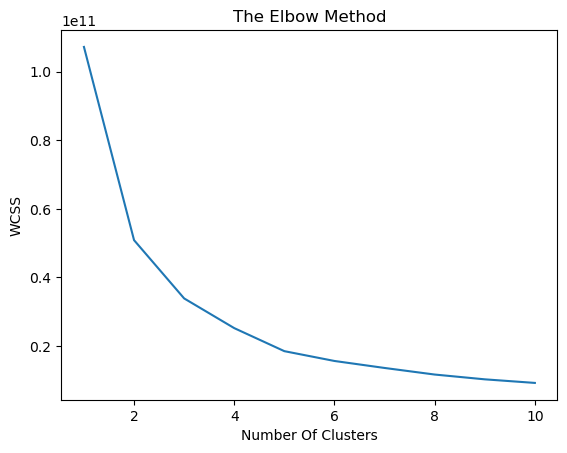

In [63]:
from sklearn.cluster import KMeans
wcss=[]#i am creating an empty list ()
for i in range(1,11): #i am giving this range(1-10), first time i will take 1 so n_clusters is 1 
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)#x is having my data 
    wcss.append(kmeans.inertia_)#if its 1 how much inertia i am going to append into wcss, likewise ill append this too all the 10
plt.plot(range(1,11),wcss)#x axis=1,11, y axis=wcss
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
#fitting K-means to the dataset 
kmeans=KMeans(n_clusters=3,random_state=42)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

[1 1 2 ... 2 2 2]


In [74]:
from sklearn.metrics import silhouette_score

In [75]:
silhouette_score(X,y_kmeans)

0.493019900372297

- TAKING 3 AS THE ELBOW POINT KMean GIVES THE BEST SCORE